# Neural Networks

## Building the Neural Networks

Use the following dataset https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv to build three different neural networks using

> different layers


> activation functions


> number of neurons per layer


> number of layers











### Data pre-processing

In [4]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Slavcho\Desktop\train.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [5]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.values.tolist()

for c in categorical_cols:
  df[c] = encoder.fit_transform(df[c])

df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [6]:
from sklearn.model_selection import train_test_split

# df.drop('id', axis=1, inplace=True)
df_copy = df.copy()

X = df_copy.drop(['Response'], axis=1)
Y = df_copy.Response.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Neural Network 1

In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Slavcho\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#### Optimize number of epochs and batch size for NN1

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=15, batch_size=10, validation_data=(X_test, Y_test))

Epoch 1/15


30489/30489 [==============================] - 73s 2ms/step - loss: 77.8192 - accuracy: 0.7913 - val_loss: 0.9377 - val_accuracy: 0.8652
Epoch 2/15
30489/30489 [==============================] - 72s 2ms/step - loss: 0.5562 - accuracy: 0.8717 - val_loss: 0.3766 - val_accuracy: 0.8751
Epoch 3/15
30489/30489 [==============================] - 73s 2ms/step - loss: 0.3709 - accuracy: 0.8780 - val_loss: 0.3766 - val_accuracy: 0.8751
Epoch 4/15
30489/30489 [==============================] - 77s 3ms/step - loss: 0.3708 - accuracy: 0.8780 - val_loss: 0.3767 - val_accuracy: 0.8751
Epoch 5/15
30489/30489 [==============================] - 80s 3ms/step - loss: 0.3709 - accuracy: 0.8780 - val_loss: 0.3767 - val_accuracy: 0.8751
Epoch 6/15
30489/30489 [==============================] - 74s 2ms/step - loss: 0.3709 - accuracy: 0.8780 - val_loss: 0.3768 - val_accuracy: 0.8751
Epoch 7/15
30489/30489 [==============================] - 67s 2ms/step - loss: 0.3709 - accuracy: 0.8780 - val_loss

### Neural Network 2

In [27]:
model2 = Sequential()


model2.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model2.fit(X_train, Y_train, epochs=5, batch_size=10, validation_data=(X_test, Y_test))

Epoch 1/5
30489/30489 [==============================] - 67s 2ms/step - loss: 75.4946 - accuracy: 0.7916 - val_loss: 2.1012 - val_accuracy: 0.8694
Epoch 2/5
30489/30489 [==============================] - 69s 2ms/step - loss: 1.9378 - accuracy: 0.8344 - val_loss: 0.3767 - val_accuracy: 0.8751
Epoch 3/5
30489/30489 [==============================] - 69s 2ms/step - loss: 0.3714 - accuracy: 0.8780 - val_loss: 0.3767 - val_accuracy: 0.8751
Epoch 4/5
30489/30489 [==============================] - 73s 2ms/step - loss: 0.3710 - accuracy: 0.8780 - val_loss: 0.3767 - val_accuracy: 0.8751
Epoch 5/5
30489/30489 [==============================] - 69s 2ms/step - loss: 0.3710 - accuracy: 0.8780 - val_loss: 0.3774 - val_accuracy: 0.8751


#### Optimize number of epochs and batch size for NN2

### Neural Network 3

In [21]:
model3 = Sequential()

model3.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model3.add(Dense(units=32, activation='relu'))
model3.add(Dense(units=1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Optimize number of epochs and batch size for NN3

In [22]:
model3.fit(X_train, Y_train, epochs=5, batch_size=10, validation_data=(X_test, Y_test))

Epoch 1/5
30489/30489 [==============================] - 68s 2ms/step - loss: 53.8527 - accuracy: 0.7980 - val_loss: 0.3890 - val_accuracy: 0.8751
Epoch 2/5
30489/30489 [==============================] - 66s 2ms/step - loss: 0.3751 - accuracy: 0.8775 - val_loss: 0.3767 - val_accuracy: 0.8751
Epoch 3/5
30489/30489 [==============================] - 72s 2ms/step - loss: 0.3709 - accuracy: 0.8780 - val_loss: 0.3767 - val_accuracy: 0.8751
Epoch 4/5
30489/30489 [==============================] - 70s 2ms/step - loss: 0.3709 - accuracy: 0.8780 - val_loss: 0.3767 - val_accuracy: 0.8751
Epoch 5/5
30489/30489 [==============================] - 70s 2ms/step - loss: 0.3709 - accuracy: 0.8780 - val_loss: 0.3769 - val_accuracy: 0.8751


## Evaluate the three NNs

In [28]:
_, accuracy1 = model.evaluate(X_train, Y_train)
print('Accuracy for model 1: %.2f' % (accuracy1*100))
_, accuracy2 = model2.evaluate(X_train, Y_train)
print('Accuracy for model 2: %.2f' % (accuracy2*100))
_, accuracy3 = model3.evaluate(X_train, Y_train)
print('Accuracy for model 3: %.2f' % (accuracy3*100))

9528/9528 [==============================] - 19s 2ms/step - loss: 0.6915 - accuracy: 0.8780
Accuracy for model 1: 87.80
9528/9528 [==============================] - 14s 2ms/step - loss: 0.3713 - accuracy: 0.8780
Accuracy for model 2: 87.80
9528/9528 [==============================] - 17s 2ms/step - loss: 0.3709 - accuracy: 0.8780
Accuracy for model 3: 87.80


## Results analysis

In [30]:
y_pred1 = model.predict(X_test)

2382/2382 [==============================] - 4s 2ms/step


In [31]:
y_pred1 = y_pred1.round()

<Axes: >

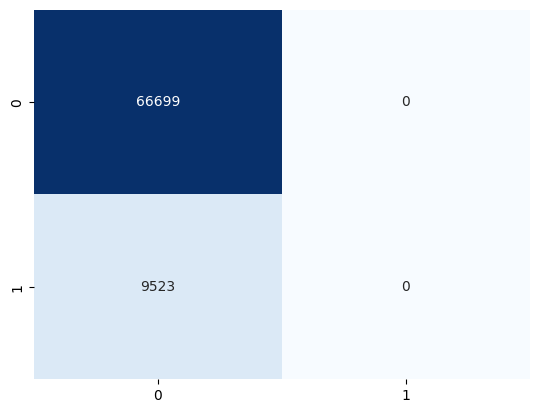

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred1)
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)